# Machine Problem 2

In [2]:
import Pkg;
Pkg.add("ForwardDiff");
Pkg.add("Plots");
Pkg.add("Symbolics");

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed StaticArraysCore ───── v1.4.2
   Installed DiffRules ──────────── v1.15.1
   Installed DiffResults ────────── v1.1.0
   Installed SpecialFunctions ───── v2.4.0
   Installed ChainRulesCore ─────── v1.23.0
   Installed StaticArrays ───────── v1.9.3
   Installed NaNMath ────────────── v1.0.2
   Installed IrrationalConstants ── v0.2.2
   Installed Compat ─────────────── v4.15.0
   Installed CommonSubexpressions ─ v0.3.0
   Installed MacroTools ─────────── v0.5.13
   Installed InverseFunctions ───── v0.1.14
   Installed ChangesOfVariables ─── v0.1.8
   Installed LogExpFunctions ────── v0.3.27
   Installed ForwardDiff ────────── v0.10.36
   Installed DocStringExtensions ── v0.9.3
   Installed OpenSpecFun_jll ────── v0.5.5+0
    Updating `~/.julia/environments/v1.8/Project.toml`
  [f6369f11] + ForwardDiff v0.10.36
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [d360d2e6] + Chai

Instructions: Implement the RMSProp and Adam (as discussed in the video lectures). You may use the helper functions provided below. 

## Helper Functions

In [3]:
using ForwardDiff
using Plots
using Symbolics

### helper functions
function optimize(f, params)
    w = rand(p)
    for t in 1:N
        x = X[t, :]
    end
end

function compute_gradient(f, x)
    grad = ForwardDiff.gradient(f, x)
    return grad
end

function symbolic_2dgradient(f)

    @variables x y

    D_x = Differential(x)
    D_y = Differential(y)

    df_dx = expand_derivatives(D_x(f(x, y)))  # Partial derivative w.r.t. x
    df_dy = expand_derivatives(D_y(f(x, y)))  # Partial derivative w.r.t. y

    println("∂f/∂x: $df_dx")
    println("∂f/∂y: $df_dy")

end

### learning algorithms
function sgd_momentum(obj_func, num_params, start, γ=0.9, η=0.001, xrange=[-10,10], yrange=[-10,10], levels=200, error=0.00001)

    θ = start
    history = θ
    grad = compute_gradient(obj_func, θ)

    while abs(grad[1]) > error || abs(grad[2]) > error
        # update this code block with rmsprop and adam
        v = zeros(num_params)
        grad = compute_gradient(obj_func, θ)
        v = γ .* v + - η .* grad
        θ = θ + v
        history = hcat(history, θ)
    end
    """
        instead of updating the weight with the current gradient, consider the previous gradient
    """

    return (round.(θ, digits=3), history)
end

### plotting

function countour_plot(func, x_scatter, y_scatter, xrange=[-10,10], yrange=[-10,10], fill=false, levels=100)
    # used to keep track of how each weight converges. points start on the outside and converge towards the center (minimum point)
    # x_scatter -> x variables of history
    # y_scatter -> y variables of history
    # levels -> number of lines to draw

    x_vals = range(xrange[1], xrange[2], length = 100)
    y_vals = range(yrange[1], yrange[2], length = 100)

    z_vals = [func(x, y) for y in y_vals, x in x_vals]
    Plots.contour(x_vals, y_vals, z_vals, levels = 50, xlabel = "x", ylabel = "y", fill=fill)
    plot!(x_scatter, y_scatter, color=:red, label="Trajectory") # line plot instead of scatter plot
    scatter!([x_scatter[1]], [y_scatter[1]], color=:black,label="Initial Solution")
    scatter!([x_scatter[end]], [y_scatter[end]], markershape=:utriangle, color=:black, label="Best Solution")
end

### helper function to generate random starting values
function random_start(start=-10.0, step=0.01, stop=10.0)
    x = rand(start:step:stop, 2)
    println("Starting Values: " * string(x))
    return x
end

random_start (generic function with 4 methods)

### You need to implement the benchmark functions below. You may refer to this page for reference: https://en.wikipedia.org/wiki/Test_functions_for_optimization

#### objective

try to let the learning algorithms reach the optimal points of these benchmark functions
#### Strategy

1. define the benchmark function
2. define the starting point (given by sir)
3. use learning algorithm, given the benchmark function, starting point
4. see if the starting point converges to one of the global minimum points (refer to wiki)

-----
#### Tasks
1. implement benchmark functions
2. implement learning algorithms
3. determine the trajectory of each function using the given starting points (use contour_plot)
4. determine the trajectory of each function using randomly generated starting points ()
   
---
#### Tips
- be careful for points that vanish - explode
- beale function is very difficult - you may need to change learning rate and v to help the learning rate converge
- be careful for when you get stuck at local minimums - gradient is 0, but there is a deeper trough based on the overall landscape
  - this tells us that the function is stuck at a local minimum - the area has a lot of local minimums
  - tune learning rate, change optimization functions
----
### question

In [5]:
### Benchmark functions (for optimization algorithms)
function beale_func(u)
    x = u[1]
    y = u[2]
    return beale_func(x,y)
end

function beale_func(x,y)
    return (1.5 - x + x*y)^2 + (2.25 - x + x*y^2)^2 + (2.625 - x + x*y^3)^2
end

function booth_func(u)
    x = u[1]
    y = u[2]
    return booth_func(x,y)
end

function booth_func(x, y)
    return (x + 2*y - 7)^2 + (2*x + y - 5)^2
end

function matyas_func(u)
    x = u[1]
    y = u[2]
    return matyas_func(x,y)
end

function matyas_func(x,y)
    return 0.26*(x^2 + y^2) - 0.48*x*y
end

function himmelblau_func(u)
    x = u[1]
    y = u[2]
    return himmelblau_func(x,y)
end

function himmelblau_func(x,y)
    return (x^2 + y - 11)^2 + (x + y^2 - 7)^2
end

function mccormick_func(u)
    x = u[1]
    y = u[2]
    return mccormick_func(x,y)
end

function mccormick_func(x,y)
    return sin(x + y) + (x - y)^2 -1.5*x + 2.5*y + 1
end

function goldstein_price_func(x,y)
    a = 1 + ((x + y + 1)^2)*(19 - 14*x + 3*x^2 - 14*y + 6*x*y + 3*y^2)
    b = 30 + ((2*x - 3*y)^2) * (18 - 32*x + 12*x^2 + 48*y - 36*x*y + 27*y^2)
    return a * b
end

function goldstein_price_func(u)
    x = u[1]
    y = u[2]
    return goldenstein_price_func(x,y)
end

function three_hump_camel_func(x,y)
    return 2*x^2 - 1.05*x^4 + (x^6)/6 + x*y + y^2
end

function three_hump_camel_func(u)
    x = u[1]
    y = u[2]
    return three_hump_camel_func(x,y)
end

three_hump_camel_func (generic function with 2 methods)

## RMSProp

In [12]:
### Implement the RMSProp here
### learning algorithms
function rmsprop(obj_func, num_params, start, γ=0.9, η=0.001, xrange=[-10,10], yrange=[-10,10], levels=200, error=0.00001)

    θ = start
    history = θ
    grad = compute_gradient(obj_func, θ)

    while abs(grad[1]) > error || abs(grad[2]) > error
        # update this code block with rmsprop


        # v = zeros(num_params)
        # grad = compute_gradient(obj_func, θ)
        # v = γ .* v + - η .* grad
        # θ = θ + v
        # history = hcat(history, θ)
    end
    """
        instead of updating the weight with the current gradient, consider the previous gradient
    """

    return (round.(θ, digits=3), history)
end
# ref: https://github.com/keras-team/keras/blob/v3.3.3/keras/src/optimizers/rmsprop.py#L6

rmsprop (generic function with 7 methods)

Task 2. For each function, determine the trajectory of the algorithm given the following starting points

In [9]:
# start_1 = [10,-10];
start_1 = [4, 1];
start_2 = [-4, 4];
start_3 = [0, 0];
start_4 = [5,5];

### Beale Function

In [10]:
func = beale_func

beale_func (generic function with 2 methods)

Best Point: [3.0, 0.5]


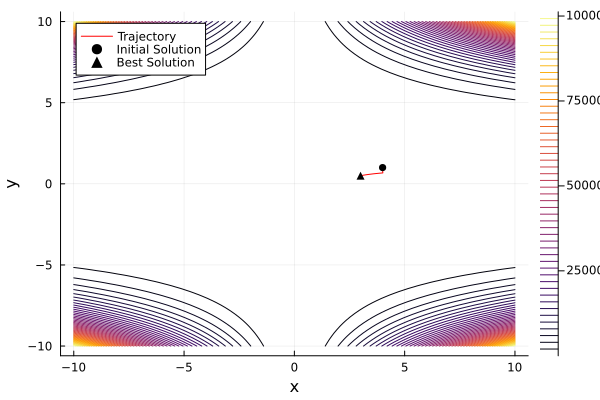

In [11]:
output = sgd_momentum(func, 2, start_1)
endpoint = output[1]
println("Best Point: " * string(endpoint))
history = output[2]
countour_plot(func, history[1,:], history[2,:])
# plot the optimal point for this function

In [ ]:
output = rmsprop(func, 2, start_2)
endpoint = output[1]
println("Best Point: " * string(endpoint))
history = output[2]
countour_plot(func, history[1,:], history[2,:])


In [ ]:
output = rmsprop(func, 2, start_3)
endpoint = output[1]
history = output[2]
countour_plot(func, history[1,:], history[2,:])

In [ ]:
output = rmsprop(func, 2, start_4)
endpoint = output[1]
history = output[2]
countour_plot(func, history[1,:], history[2,:])

In [54]:
# Testing Our Own Input:
start = random_start()
output = sgd_momentum(func, 2, start)
endpoint = output[1]
history = output[2]
countour_plot(func, history[1,:], history[2,:])

### Booth Function

In [ ]:
func = booth_func

In [ ]:
output = rmsprop(func, 2, start_1)

In [ ]:
output = rmsprop(func, 2, start_2)

In [ ]:
output = rmsprop(func, 2, start_3)

In [ ]:
output = rmsprop(func, 2, start_4)

### Matyas Function

### Himmelblau Function

### Mccormick Function

### Goldstein-Price Function

### Three-Hump Camel Function

Task 3. For each function, plot the trajectory of the algorithm using four randomly generated starting points of your choice.

### Beale Function

### Booth Function

### Matyas Function

### Himmelblau Function

### Mccormick Function

### Goldstein-Price Function

### Three-Hump Camel Function

## Adaptive Moment Estimation (Adam)

In [ ]:
### Implement the RMSProp here
function adam()
    nothing
end
# ref: 

Task 1. Plot the Contour of each considered function

In [ ]:
start_1 = [10,-10];
start_2 = [-4, 4];
start_3 = [0, 0];
start_4 = [5,5];

Task 2. For each function, determine the trajectory of the algorithm given the following starting points

Task 3. For each function, plot the trajectory of the algorithm using four randomly generated starting points of your choice.